# Repaso (Módulo 3)
> Recordar que el tema principal del módulo son las ecuaciones diferenciales. Entonces, al finalizar este módulo, las competencias principales que deben tener ustedes es
> - Resolver de forma numérica ecuaciones diferenciales ordinarias (EDO) de cualquier orden.
> - Graficar soluciones de dichas EDO en diferentes representaciones. Interpretar o concluir acerca de las gráficas que se obtuvieron.
> - Resolver de forma simbólica EDOs.

___
## Crecimiento de población: Conejos vs. Ovejas.

Imaginemos que en un mismo ecosistema se encuentran conejos y ovejas. Supongamos, además, que ambas compiten por el mismo alimento (hierba) y que la cantidad total de alimento es limitada. Se ignoran otros factores como depredadores, efectos de temporada (estaciones), y otras fuentes de comida. El modelo de competición entre dos especies **Lotka-Volterra** nos sirve para describir este fenómeno.

Dos fenómenos importantes:
- Cada especie crecería hasta su capacidad máxima en ausencia de la otra especie. Esto se puede modelar con la ecuación logística para cada especie. Los conejos tienen una habilidad soprendente para reproducirse, entonces comparativamente deberían crecer más.
- Cuando conejos y ovejas se encuentran, empieza la competencia. Algunas veces los conejos comen, pero las ovejas (al ser más grandes) ganarán el derecho a la comida la mayoría de las veces. Supondremos que dichos conflictos se dan a una tasa proporcional al tamaño de cada población (si hay dos veces más ovejas, la probabilidad de que un conejo encuentre a una oveja será el doble). Supondremos que dicha competencia disminuirá la tasa de crecimiento para cada especie, y el efecto será mayor para los conejos.

Con las consideraciones anteriores, un modelo específico es:

\begin{align}
\frac{dx_1}{dt} &= x_1(3-x_1-2x_2)\\
\frac{dx_2}{dt} &= x_2(2-x_2-x_1),
\end{align}

donde $x_1(t)\geq 0$ es la población de conejos al instante $t$ y $x_2(t)\geq 0$ es la población de ovejas al instante $t$. Definimos $x=\left[x_1\quad x_2\right]^T$.

Esta selección de coeficientes se tiene para recrear el escenario descrito. Sin embargo, este modelo se puede utilizar para estudiar competición entre especies en general y los coeficientes cambiarán en cada caso.

Simule el sistema para cada una de las siguientes condiciones iniciales. Para cada caso, obtenga gráficas de $x_1$ vs. $t$, $x_2$ vs. $t$ y $x_2$ vs. $x_1$. ¿Qué pasa con las poblaciones de conejos y de ovejas cuando $t\to\infty$? ¿Pueden coexistir?

1. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [0.5 \quad 1]^T$.
2. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 0.5]^T$.
3. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1.5 \quad 1]^T$.
4. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1.5]^T$.
5. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1]^T$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [14]:
def conejosOvejas(x,t):
  dx=np.zeros(2)
  dx[0]=x[0]*(3-x[0]-2*x[1])
  dx[1]=x[1]*(2-x[1]-x[0])
  return dx
t=np.linspace(0,20,1000)

In [16]:
# Caso 1.
x0=np.array([0.5,1])
x=odeint(conejosOvejas,x0,t)
x.shape

(1000, 2)

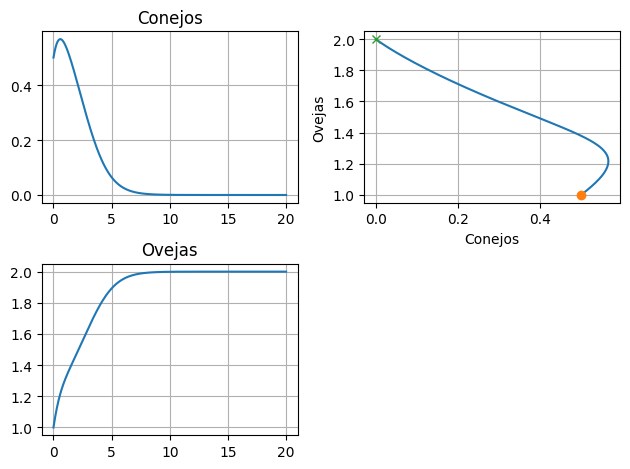

In [22]:
fig,ax=plt.subplots(2,2)
ax[0,0].plot(t,x[:,0])
ax[0,0].set_title('Conejos')
ax[0,0].grid()
ax[1,0].plot(t,x[:,1])
ax[1,0].set_title('Ovejas')
ax[1,0].grid()
ax[0,1].plot(x[:,0],x[:,1],x[0,0],x[0,1],'o',x[-1,0],x[-1,1],'x')
ax[0,1].set(xlabel='Conejos',ylabel='Ovejas')
ax[0,1].grid()
#ax[1,1].set_axis_off()
ax[1,1].remove()
plt.tight_layout()

In [23]:
def grafica(x0):
  x=odeint(conejosOvejas,x0,t)
  fig,ax=plt.subplots(2,2)
  ax[0,0].plot(t,x[:,0])
  ax[0,0].set_title('Conejos')
  ax[0,0].grid()
  ax[1,0].plot(t,x[:,1])
  ax[1,0].set_title('Ovejas')
  ax[1,0].grid()
  ax[0,1].plot(x[:,0],x[:,1],x[0,0],x[0,1],'o',x[-1,0],x[-1,1],'x')
  ax[0,1].set(xlabel='Conejos',ylabel='Ovejas')
  ax[0,1].grid()
  #ax[1,1].set_axis_off()
  ax[1,1].remove()
  plt.tight_layout()

In [ ]:
# Caso 2.
x0=np.array([1,0.5])
grafica(x0)

In [ ]:
# Caso 3.
x0=np.array([1.5,1])
grafica(x0)

In [ ]:
# Caso 4.
x0=np.array([1,1.5])
grafica(x0)

In [ ]:
# Caso 5.
x0=np.array([1,1])
grafica(x0)

**Conclusión:**


>El único escenario donde pueden coexistir conejos y ovejas es con condiciones iniciales $(1,1)$, siendo éste un punto de equilibrio inestable.

Referencia:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

## Otro ejemplo
Resolver simbólicamente la siguientes ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [29]:
import sympy as sym

In [31]:
sym.var('t')
x=sym.Function('x')
eq=x(t).diff(t)-x(t)/(t+1)
eq

Derivative(x(t), t) - x(t)/(t + 1)

In [32]:
sol=sym.dsolve(eq,x(t))
sol

Eq(x(t), C1*(t + 1))

Obtener la solución numérica con una condición inicial $x(0)=1$ y graficarla

In [ ]:
def eqdiff(x,t):
  return x/(t+1)
x0=1
t=np.linspace(0,20,1000)
x=odeint(eqdiff,x0,t)
plt.plot(t,x)
plt.grid()

Comparar la solución numérica con la solución analítica (exacta). Graficar el error.

In [34]:
analitica=sol.args[1].subs('C1',1).as_expr()
analitica

t + 1

In [36]:
exacta=sym.lambdify(sym.var('t'),analitica,'numpy')

In [39]:
x.shape

(1000, 1)

In [40]:
t=np.linspace(0,20,1000)
exacta(t).shape

(1000,)

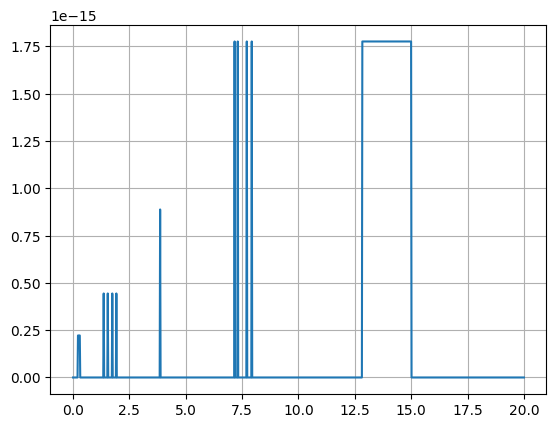

In [41]:
error=np.abs(exacta(t)-x[:,0])
plt.plot(t,error)
plt.grid()